In [1]:
path = %pwd
print(path)

c:\python\20191207-yyyymmdd-第四階段-假日\20200208-day7\AM


In [2]:
import ast , numpy as np
with open('train_data.txt') as f:
    train_data = np.array(ast.literal_eval(f.read())).astype('float32')

with open('train_labels.txt') as f:
    train_labels = np.array(ast.literal_eval(f.read())).astype('int')
    

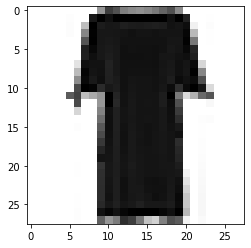

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(train_data[2, :, :, :].reshape(28, 28), cmap='gray_r')
plt.show()

In [4]:
# 檢查數據狀況
train_data.shape, train_labels.shape, train_labels[:1]

((50, 28, 28, 1), (50, 3), array([[0, 1, 0]]))

In [5]:
# 建立 model 
# the Sequential model
# the Model class used with the functional API.

In [6]:
# the Sequential model type II
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization

model = Sequential()
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same', input_shape=(28, 28, 1)) )
#model.add( Dropout(0.25) )
model.add( BatchNormalization() )
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same') )
#model.add( Dropout(0.25) )
model.add( BatchNormalization() )
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same') )
model.add( Flatten())

model.add( Dense(units= 32, activation='relu', input_dim=784) )
model.add( Dense(units= 3, activation='softmax') )
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 5)         25        
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 5)         20        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 5)         105       
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 5)         20        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 5)         105       
_________________________________________________________________
flatten_1 (Flatten)          (None, 3920)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)               

In [7]:
# dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
# Keras : 2.3.0
# https://keras.io/callbacks/#earlystopping

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
checkpoint = ModelCheckpoint('weights.hdf5', monitor='accuracy', save_best_only=True, verbose=1) # 顯示變更部分
earlystopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1) # 針對3次 val_accuracy 沒有改變就自動停止
callbacks_list = [earlystopping, checkpoint]

In [8]:
# 編譯
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# <keras.callbacks.callbacks.History at 0x1b93db60748>
history = model.fit(train_data, train_labels, batch_size=10, 
                    epochs=100, 
                    verbose=1, 
                    validation_split=0.2, 
                    callbacks = callbacks_list)

Train on 40 samples, validate on 10 samples
Epoch 1/100
40/40 [==============================] - 4s 89ms/step - loss: 1.0073 - accuracy: 0.5250 - val_loss: 1.0812 - val_accuracy: 0.9000

Epoch 00001: accuracy improved from -inf to 0.52500, saving model to weights.hdf5
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2340 - accuracy: 0.9000 - val_loss: 1.0369 - val_accuracy: 0.9000

Epoch 00002: accuracy improved from 0.52500 to 0.90000, saving model to weights.hdf5
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1034 - accuracy: 0.9500 - val_loss: 0.9759 - val_accuracy: 0.9000

Epoch 00003: accuracy improved from 0.90000 to 0.95000, saving model to weights.hdf5
Epoch 4/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0427 - accuracy: 1.0000 - val_loss: 0.9294 - val_accuracy: 1.0000

Epoch 00004: accuracy improved from 0.95000 to 1.00000, saving model to weights.hdf5
Epoch 5/100
40/40 [==============================]

In [9]:
# <keras.callbacks.callbacks.History at 0x1b93db60748>
history.history.keys()
# history.history.get('loss'), history.history.get('accuracy')

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

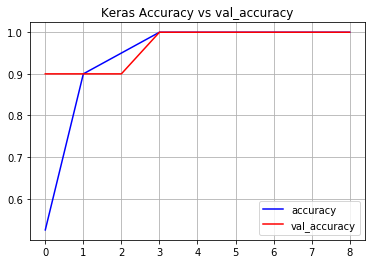

In [10]:
import matplotlib.pyplot as plt
plt.title('Keras Accuracy vs val_accuracy')

plt.plot(history.history.get('accuracy'), color='blue')
plt.plot(history.history.get('val_accuracy'), color='red')
plt.legend(['accuracy', 'val_accuracy'])

plt.grid()
plt.show()

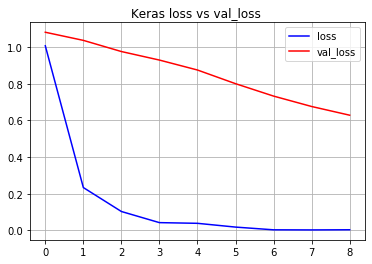

In [11]:
import matplotlib.pyplot as plt
plt.title('Keras loss vs val_loss ')
plt.plot(history.history.get('loss'), color='blue')
plt.plot(history.history.get('val_loss'), color='red')
plt.legend(['loss', 'val_loss'])
plt.grid()
plt.show()

In [12]:
model.evaluate(train_data, train_labels)[1] * 100.0

50/50 [==============================] - 0s 8ms/step


87.99999952316284

In [13]:
# 找出過去幾次訓練中的最佳參數

model.load_weights('weights.hdf5')
np.sum(model.predict_classes(train_data[:]) == np.argmax(train_labels, axis=1)) / len(train_data) * 100

94.0

In [14]:
# 檢視載入權重
model.weights

[<tf.Variable 'conv2d_1/kernel:0' shape=(2, 2, 1, 5) dtype=float32, numpy=
 array([[[[-0.21995458, -0.36657166,  0.4696081 , -0.09725926,
            0.14331701]],
 
         [[-0.08239313, -0.35631302,  0.06796208, -0.276285  ,
           -0.49419186]]],
 
 
        [[[ 0.06872216,  0.32614902,  0.38981467,  0.500161  ,
           -0.4313793 ]],
 
         [[-0.2567509 ,  0.4380206 ,  0.18133102, -0.02478982,
            0.04926238]]]], dtype=float32)>,
 <tf.Variable 'conv2d_1/bias:0' shape=(5,) dtype=float32, numpy=
 array([-0.00302811, -0.0025801 , -0.00680859,  0.00324784,  0.00142716],
       dtype=float32)>,
 <tf.Variable 'batch_normalization_1/gamma:0' shape=(5,) dtype=float32, numpy=
 array([0.9984865 , 0.9897322 , 1.0038915 , 1.0081    , 0.99720526],
       dtype=float32)>,
 <tf.Variable 'batch_normalization_1/beta:0' shape=(5,) dtype=float32, numpy=
 array([ 0.0068376 ,  0.00291452, -0.00801577,  0.00825943,  0.00786824],
       dtype=float32)>,
 <tf.Variable 'conv2d_2/kernel